**load libraries**

In [250]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

**Read the dataset**

In [251]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

**shape of datset**

In [252]:
train.shape

(614, 13)

# **preprocessing**

In [253]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [254]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [255]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [256]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [257]:
train.drop(columns='Loan_ID',inplace =True)
test.drop(columns='Loan_ID',inplace =True)

In [258]:
for i in [train]:
    i['Gender'] = i['Gender'].fillna(train.Gender.dropna().mode()[0])
    i['Married'] = i['Married'].fillna(train.Married.dropna().mode()[0])
    i['Dependents'] = i['Dependents'].fillna(train.Dependents.dropna().mode()[0])
    i['Self_Employed'] = i['Self_Employed'].fillna(train.Self_Employed.dropna().mode()[0])
    i['Credit_History'] = i['Credit_History'].fillna(train.Credit_History.dropna().mode()[0])
    i['LoanAmount'] = i['LoanAmount'].fillna(train.LoanAmount.dropna().mode()[0])
    i['Loan_Amount_Term'] = i['Loan_Amount_Term'].fillna(train.Loan_Amount_Term.dropna().mode()[0])

In [259]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [260]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [261]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

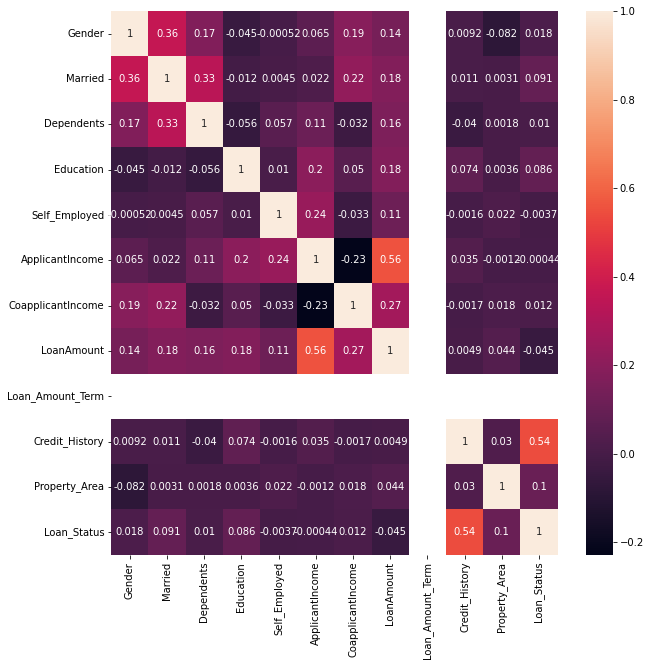

In [290]:
plt.figure(figsize=(10,10))
corr_matrx=train.corr()
sns.heatmap(corr_matrx,annot=True)
plt.show

**Converting categorical columns to numerical**

In [262]:
train.Gender=train.Gender.map({"Female":0,"Male":1}).astype(int)
train.Married=train.Married.map({"No":0,"Yes":1}).astype(int)
train.Self_Employed=train.Self_Employed.map({"No":0,"Yes":1}).astype(int)
train.Education=train.Education.map({"Not Graduate":0,"Graduate":1}).astype(int)
train.Property_Area=train.Property_Area.map({"Urban":0,"Rural":1,'Semiurban':2}).astype(int)
train.Loan_Status=train.Loan_Status.map({"N":0,"Y":1}).astype(int)
train.Dependents=train.Dependents.map({"3+":3,"0":0,"1":1,"2":2}).astype(int)

In [263]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


In [264]:
for i in [test]:
    i['Gender'] = i['Gender'].fillna(test.Gender.dropna().mode()[0])
    i['Married'] = i['Married'].fillna(test.Married.dropna().mode()[0])
    i['Dependents'] = i['Dependents'].fillna(test.Dependents.dropna().mode()[0])
    i['Self_Employed'] = i['Self_Employed'].fillna(test.Self_Employed.dropna().mode()[0])
    i['Credit_History'] = i['Credit_History'].fillna(test.Credit_History.dropna().mode()[0])
    i['LoanAmount'] = i['LoanAmount'].fillna(test.LoanAmount.dropna().mode()[0])
    i['Loan_Amount_Term'] = i['Loan_Amount_Term'].fillna(test.Loan_Amount_Term.dropna().mode()[0])

In [265]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [266]:
test.Gender=test.Gender.map({"Female":0,"Male":1}).astype(int)
test.Married=test.Married.map({"No":0,"Yes":1}).astype(int)
test.Self_Employed=test.Self_Employed.map({"No":0,"Yes":1}).astype(int)
test.Education=test.Education.map({"Not Graduate":0,"Graduate":1}).astype(int)
test.Property_Area=test.Property_Area.map({"Urban":0,"Rural":1,'Semiurban':2}).astype(int)
test.Dependents=test.Dependents.map({"3+":3,"0":0,"1":1,"2":2}).astype(int)

In [267]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


# **EDA**

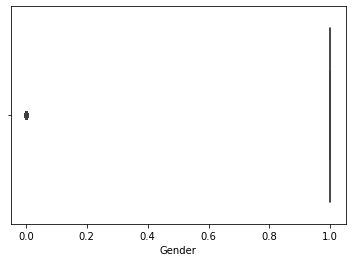

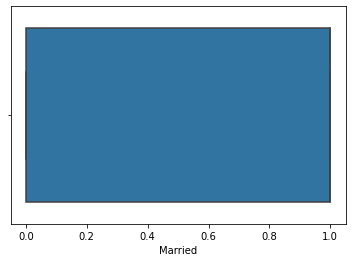

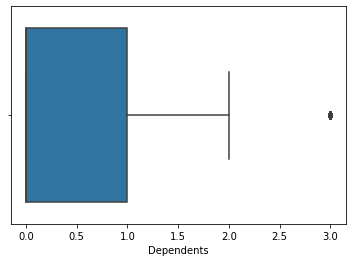

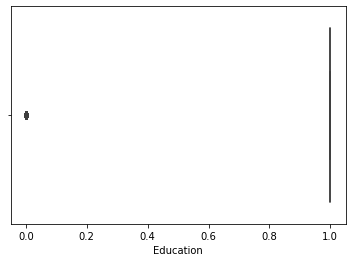

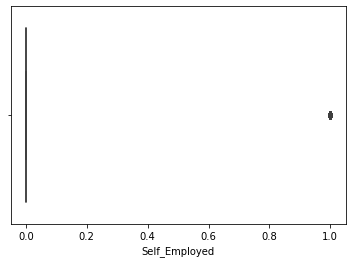

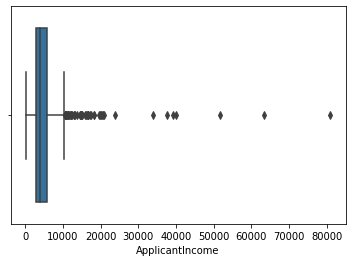

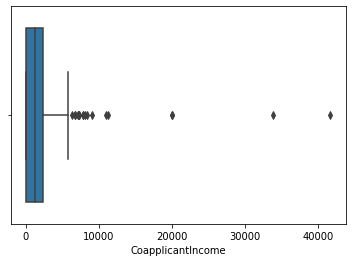

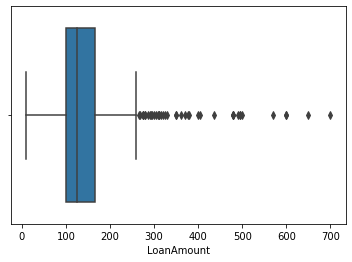

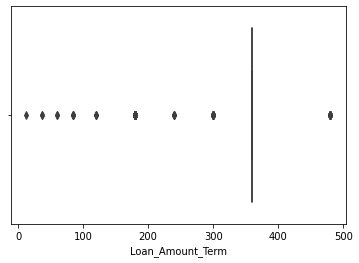

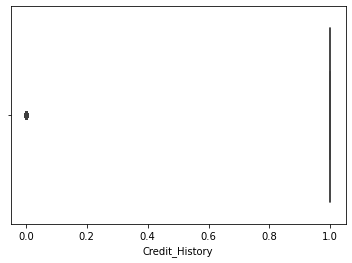

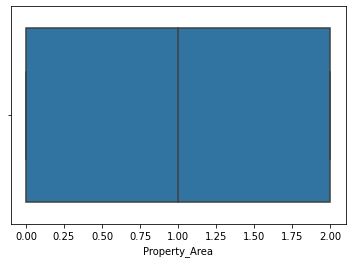

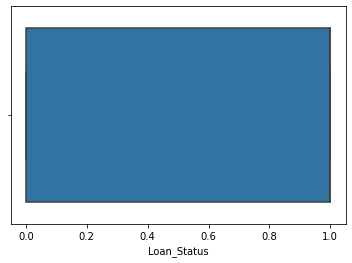

In [268]:
for i in train:
  sns.boxplot(x=train[i])
  plt.show()

In [269]:
def remove_outlier(i):
    sorted(i)
    Q1,Q3=np.percentile(i,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [270]:
lr,ur=remove_outlier(train['ApplicantIncome'])
print('Lower Range :',lr,'\nUpper Range :',ur)
train['ApplicantIncome']=np.where(train['ApplicantIncome']>ur,ur,train['ApplicantIncome'])
train['ApplicantIncome']=np.where(train['ApplicantIncome']<lr,lr,train['ApplicantIncome'])

Lower Range : -1498.75 
Upper Range : 10171.25


In [271]:
lr,ur=remove_outlier(train['LoanAmount'])
print('Lower Range :',lr,'\nUpper Range :',ur)
train['LoanAmount']=np.where(train['LoanAmount']>ur,ur,train['LoanAmount'])
train['LoanAmount']=np.where(train['LoanAmount']<lr,lr,train['LoanAmount'])

Lower Range : 3.5 
Upper Range : 261.5


In [272]:
lr,ur=remove_outlier(train['CoapplicantIncome'])
print('Lower Range :',lr,'\nUpper Range :',ur)
train['CoapplicantIncome']=np.where(train['CoapplicantIncome']>ur,ur,train['CoapplicantIncome'])
train['CoapplicantIncome']=np.where(train['CoapplicantIncome']<lr,lr,train['CoapplicantIncome'])

Lower Range : -3445.875 
Upper Range : 5743.125


In [273]:
lr,ur=remove_outlier(train['Loan_Amount_Term'])
print('Lower Range :',lr,'\nUpper Range :',ur)
train['Loan_Amount_Term']=np.where(train['Loan_Amount_Term']>ur,ur,train['Loan_Amount_Term'])
train['Loan_Amount_Term']=np.where(train['Loan_Amount_Term']<lr,lr,train['Loan_Amount_Term'])

Lower Range : 360.0 
Upper Range : 360.0


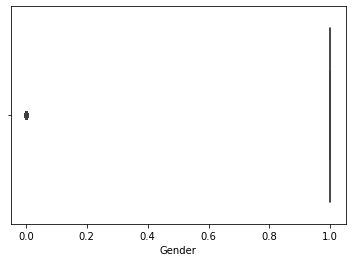

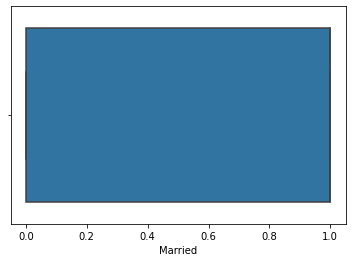

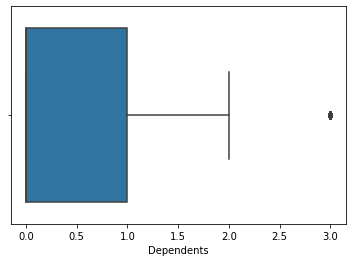

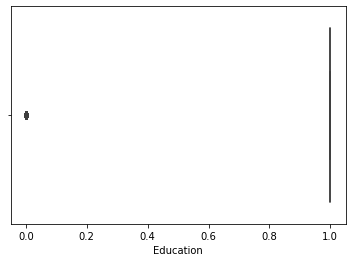

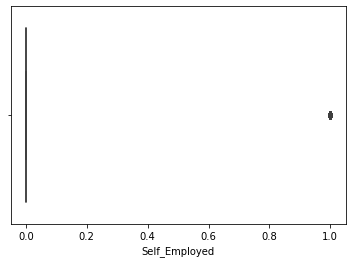

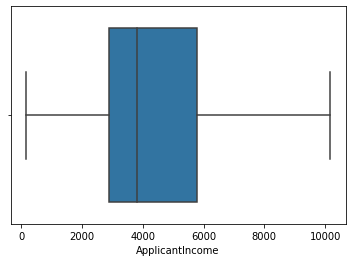

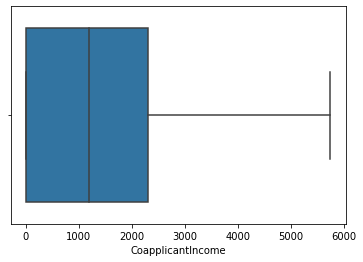

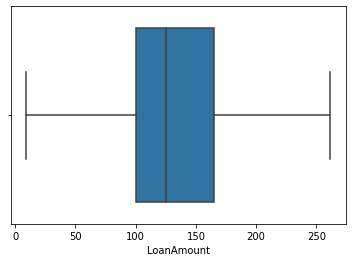

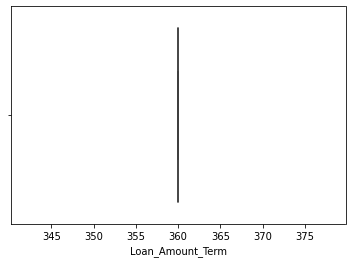

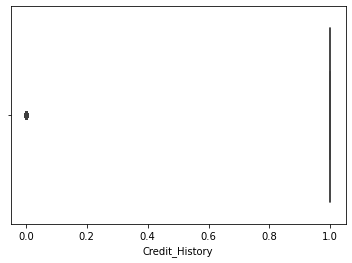

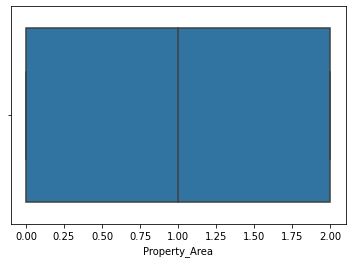

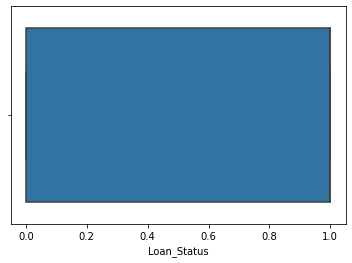

In [274]:
for i in train:
  sns.boxplot(x=train[i])
  plt.show()

# **Data Modelling**

In [275]:
y= train['Loan_Status']
X= train.drop('Loan_Status', axis=1)

In [276]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.3, stratify=y, random_state=42)

In [277]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score


In [278]:
value= [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(),GradientBoostingClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier',  'KNeighborsClassifier','GradientBoostingClassifier']

In [279]:
models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

LogisticRegression
0.8486486486486486
RandomForsetClassifier
0.8162162162162162
KNeighborsClassifier
0.6054054054054054
GradientBoostingClassifier
0.7621621621621621


In [280]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [281]:
y_pred=lr.predict(test)

In [282]:
sample_submission=pd.read_csv('sample_submission.csv')

In [283]:
sample_submission['Loan_Status']=y_pred


In [284]:
status={1: 'Y', 0: 'N'}
sample_submission['Loan_Status']=sample_submission['Loan_Status'].map(status)

In [285]:
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [286]:
sample_submission.to_csv('varsha_mk.csv')

**Logistic regression is more accurate:approximately 84.8%**

# **Fine Tuning**

In [288]:
from sklearn.model_selection import GridSearchCV


paramgrid = {'max_depth': list(range(1, 20, 2)), 
                    'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
# Fit the grid search model 
grid_search.fit(X_train,y_train)
GridSearchCV(cv=None, error_score='raise',       
        estimator=RandomForestClassifier(bootstrap=True, class_weight=None, 
                criterion='gini', max_depth=None, max_features='auto', 
                max_leaf_nodes=None, min_impurity_decrease=0.0,  
min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, 
random_state=1, verbose=0, warm_start=False),       
param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
     'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},       

pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',scoring=None, verbose=0)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(max_features='auto',
                                              n_estimators=10, n_jobs=1,
                                              random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')